# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd;
import pprint as pp;
import numpy as np;

In [2]:
act_data= pd.read_csv("../data/act.csv");
sat_data= pd.read_csv("../data/sat.csv");

##### 2. Print the first ten rows of each dataframe.

In [3]:
#test to see if composite= mean...it's not exactly
sum([24.4,23.5,24.9,23.5])/4

24.075

In [4]:
act_data.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat_data.sort_values('Math').head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,20,Maryland,69%,536,52,1060
8,8,District of Columbia,100%,482,468,950
7,7,Delaware,100%,503,492,996
12,12,Idaho,93%,513,493,1005
22,22,Michigan,100%,509,495,1005
9,9,Florida,83%,520,497,1017
19,19,Maine,95%,513,499,1012
43,43,Texas,62%,513,507,1020
6,6,Connecticut,100%,530,512,1041
10,10,Georgia,61%,535,515,1050


##### 3. Describe in words what each variable (column) is.

**Unamed: 0:** A type of indexing<br>
**State:** The sate from which the test data is collected<br>
**Participation:** The percentage of students who take the exam<br>
**Evidence-Based Reading and Writing/ Math/ Total (SAT):** The average Reading & Writing and Math SAT scores for that state, along with the sum of the two.<br>
**English/Math/Reading/Science/Composite (ACT):** The average ACT scores for the given subject, along with the Composite, which is approximately an average of the four other scores

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete, for the most part. However, it is lacking any date or trend information (The sites state that it is 2017 data, along with extra info such as Nevada's recent mandatory ACT testing). Also, it's not clear what "Unnamed: 0" is for.

##### 5. Print the types of each column.

In [6]:
print(act_data.dtypes,'\n', sat_data.dtypes)

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object 
 Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [7]:
# Cast the Participation strings to floats
act_data.Participation= act_data.Participation.str.rstrip('%').astype('float')/ 100.0;
sat_data.Participation= sat_data.Participation.str.rstrip('%').astype('float')/ 100.0;

In [8]:
act_data.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


### Two scores for Maryland are put in incorrectly: SAT Math and Science. I will change them here. SAT Math: 524 and Science: 23.2

In [9]:
act_data.loc[act_data['State']=='Maryland', 'Science']= 23.2

sat_data.loc[sat_data['State']=='Maryland', 'Math']= 524

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [10]:
sat_participation= sat_read_write= sat_math= {}

In [11]:
# Loop through the rows in sat_data and place corresponding state/value in appropriate dict
for r in sat_data.itertuples():
#     print(r)
    curr_state=r.State;
    sat_participation[curr_state]=r.Participation;
    sat_read_write[curr_state]= r._4; #Pandas doesn't like "Evidence-Based Reading and Writing" so itertuples() set it to _4
    sat_math[curr_state]=r.Math;    

In [12]:
act_science = act_math = act_english = act_reading = act_composite = {};

In [13]:
for row in act_data.itertuples(): 
    curr_state= row.State;
    act_science[curr_state] = row.Science
    act_math[curr_state] = row.Math
    act_english[curr_state] = row.English 
    act_reading[curr_state] = row.Reading
    act_composite[curr_state] =row.Composite 

In [14]:
act_math['Texas']

20.7

In [15]:
print (sat_math['Texas'])

507


##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [16]:
sat_dict={col: sat_data[col].tolist() for col in sat_data.columns};
act_dict={col: act_data[col].tolist() for col in act_data.columns}

In [17]:
print(act_dict)

{'Unnamed: 0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], 'State': ['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], 'Participation': [0.6, 1.0, 0.65, 0.62, 1.0, 0.31, 1.0, 0.31, 0.18, 0.32, 0.73, 0.55, 0.9, 0.38, 0.93, 0.35, 0.67, 0

##### 9. Merge the dataframes on the state column.

In [18]:
combined_data=sat_data.merge(act_data, on='State', suffixes=('_SAT', '_ACT'))

In [19]:
combined_data.head(10)

,Unnamed: 0_SAT,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Unnamed: 0_ACT,Participation_ACT,English,Math_ACT,Reading,Science,Composite
0,0,Alabama,0.05,593,572,1165,1,1.00,18.9,18.4,19.7,19.4,19.2
1,1,Alaska,0.38,547,533,1080,2,0.65,18.7,19.8,20.4,19.9,19.8
2,2,Arizona,0.30,563,553,1116,3,0.62,18.6,19.8,20.1,19.8,19.7
3,3,Arkansas,0.03,614,594,1208,4,1.00,18.9,19.0,19.7,19.5,19.4
4,4,California,0.53,531,524,1055,5,0.31,22.5,22.7,23.1,22.2,22.8
5,5,Colorado,0.11,606,595,1201,6,1.00,20.1,20.3,21.2,20.9,20.8
6,6,Connecticut,1.00,530,512,1041,7,0.31,25.5,24.6,25.6,24.6,25.2
7,7,Delaware,1.00,503,492,996,8,0.18,24.1,23.4,24.8,23.6,24.1
8,8,District of Columbia,1.00,482,468,950,9,0.32,24.4,23.5,24.9,23.5,24.2
9,9,Florida,0.83,520,497,1017,10,0.73,19.0,19.4,21.0,19.4,19.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

Done in previous step

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [20]:
from pandas.api.types import is_numeric_dtype;
combined_data=combined_data.drop(columns=['Unnamed: 0_SAT', 'Unnamed: 0_ACT']);

In [21]:
for col in combined_data:
    if is_numeric_dtype(combined_data[col]):
        min_idx= combined_data[col].idxmin();
        max_idx= combined_data[col].idxmax();
        print(f"{col}: Min:({combined_data[col][min_idx]}, {combined_data['State'][min_idx]}) Max:({combined_data[col][max_idx]}, {combined_data['State'][max_idx]}) ");

Participation_SAT: Min:(0.02, Iowa) Max:(1.0, Connecticut) 
Evidence-Based Reading and Writing: Min:(482, District of Columbia) Max:(644, Minnesota) 
Math_SAT: Min:(468, District of Columbia) Max:(651, Minnesota) 
Total: Min:(950, District of Columbia) Max:(1295, Minnesota) 
Participation_ACT: Min:(0.08, Maine) Max:(1.0, Alabama) 
English: Min:(16.3, Nevada) Max:(25.5, Connecticut) 
Math_ACT: Min:(18.0, Nevada) Max:(25.3, Massachusetts) 
Reading: Min:(18.1, Nevada) Max:(26.0, New Hampshire) 
Science: Min:(18.2, Nevada) Max:(24.9, New Hampshire) 
Composite: Min:(17.8, Nevada) Max:(25.5, New Hampshire) 


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [22]:
import math

In [23]:
# want to set the non_numeric columns to NaN for easier manipulation in later steps. Otherwise remove the 'else condition'
sd= [np.std(combined_data[col]) if is_numeric_dtype(combined_data[col]) else np.nan for col in combined_data]
# same thing without using np.std
# sd= [np.sqrt(np.mean((combined_data[col]-np.mean(combined_data[col]))**2)) if is_numeric_dtype(combined_data[col]) else np.nan for col in combined_data]

In [24]:
print(sd)

[nan, 0.3492907076664507, 45.21697020437866, 46.65713364485504, 91.58351056778743, 0.31824175751231804, 2.3304876369363368, 1.9624620273436781, 2.046902931484265, 1.7222161451443672, 2.0007860815819893]


## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [25]:
# Turn the NaN to a descriptive "Standard Deviations"
sd[0]='Standard Deviations';
# Turn it into a dataframe 
sd_to_df= pd.DataFrame([sd], columns=combined_data.columns);
#Append
combined_data= combined_data.append(sd_to_df, ignore_index=True)

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [26]:
def score_sort(df, col_name, asc=False):
    if is_numeric_dtype(df[col_name]):
        return df.sort_values(by=col_name, axis=0, ascending=asc);
    else:
        raise "Column must be numeric"

In [27]:
# Second argument is for ascending, defaults to False (descending)
score_sort(combined_data,'Composite', asc=True).head(10)

,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
51,Standard Deviations,0.349291,45.21697,46.657134,91.583511,0.318242,2.330488,1.962462,2.046903,1.722216,2.000786
28,Nevada,0.260000,563.00000,553.000000,1116.000000,1.000000,16.300000,18.000000,18.100000,18.200000,17.800000
24,Mississippi,0.020000,634.00000,607.000000,1242.000000,1.000000,18.200000,18.100000,18.800000,18.800000,18.600000
40,South Carolina,0.500000,543.00000,521.000000,1064.000000,1.000000,17.500000,18.600000,19.100000,18.900000,18.700000
11,Hawaii,0.550000,544.00000,541.000000,1085.000000,0.900000,17.800000,19.200000,19.200000,19.300000,19.000000
33,North Carolina,0.490000,546.00000,535.000000,1081.000000,1.000000,17.800000,19.300000,19.600000,19.300000,19.100000
0,Alabama,0.050000,593.00000,572.000000,1165.000000,1.000000,18.900000,18.400000,19.700000,19.400000,19.200000
36,Oklahoma,0.070000,530.00000,517.000000,1047.000000,1.000000,18.500000,18.800000,20.100000,19.600000,19.400000
3,Arkansas,0.030000,614.00000,594.000000,1208.000000,1.000000,18.900000,19.000000,19.700000,19.500000,19.400000
18,Louisiana,0.040000,611.00000,586.000000,1198.000000,1.000000,19.400000,18.800000,19.800000,19.600000,19.500000


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [28]:
def filter_scores(df, topic, threshold):
    return df[df[topic] >= threshold]

In [29]:
f_scores=filter_scores(combined_data,'Participation_SAT', .5);
f_and_s_scores= score_sort(f_scores, 'Science');
f_and_s_scores.head(10)

,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
29,New Hampshire,0.96,532.0,520.0,1052.0,0.18,25.4,25.1,26.0,24.9,25.5
21,Massachusetts,0.76,555.0,551.0,1107.0,0.29,25.4,25.3,25.9,24.7,25.4
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
32,New York,0.67,528.0,523.0,1052.0,0.31,23.8,24.0,24.6,23.9,24.2
22,Michigan,1.00,509.0,495.0,1005.0,0.29,24.1,23.7,24.5,23.8,24.1
19,Maine,0.95,513.0,499.0,1012.0,0.08,24.2,24.0,24.8,23.7,24.3
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
46,Virginia,0.65,561.0,541.0,1102.0,0.29,23.5,23.3,24.6,23.5,23.8
39,Rhode Island,0.71,539.0,524.0,1062.0,0.21,24.0,23.3,24.7,23.4,24.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [30]:
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set()

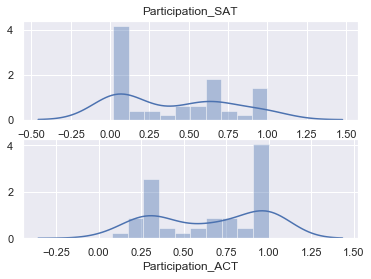

In [31]:
stdev_free_combined= combined_data.drop([51]); # take out the deviations row.
fig=plt.figure()
ax1 = fig.add_subplot(211, title= 'Participation_SAT') #This is a hack...but it looks all right!
ax2 = fig.add_subplot(212)
for idx, rate_series in enumerate([stdev_free_combined['Participation_SAT'], stdev_free_combined['Participation_ACT']]):
#     plt.title(idx)
    sns.distplot(rate_series, bins=10, ax=[ax1, ax2][idx], label=rate_series.name);

In [32]:
stdev_free_combined['Participation_SAT'].name

'Participation_SAT'

##### 17. Plot the Math(s) distributions from both data sets.

In [33]:
score_sort(stdev_free_combined,'Math_SAT', asc=True).head(5)

,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
12,Idaho,0.93,513.0,493.0,1005.0,0.38,21.9,21.8,23.0,22.1,22.3
22,Michigan,1.00,509.0,495.0,1005.0,0.29,24.1,23.7,24.5,23.8,24.1
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8


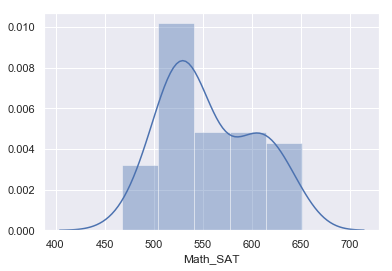

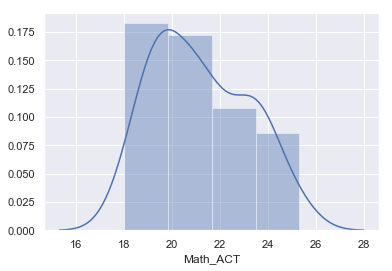

<Figure size 432x288 with 0 Axes>

In [34]:
for rate_series in [stdev_free_combined['Math_SAT'], stdev_free_combined['Math_ACT']]:
    sns.distplot(rate_series);
    plt.show()
    plt.clf()

<h3>This step is where I first noticed the problem with Maryland's outliers</h3>

##### 18. Plot the Verbal distributions from both data sets.

In [35]:
stdev_free_combined.columns

Index(['State', 'Participation_SAT', 'Evidence-Based Reading and Writing',
       'Math_SAT', 'Total', 'Participation_ACT', 'English', 'Math_ACT',
       'Reading', 'Science', 'Composite'],
      dtype='object')

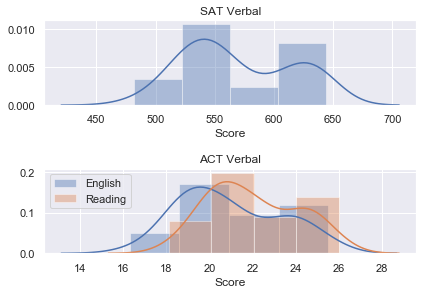

In [36]:
# Create a figure instance, and the two subplots
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_title('SAT Verbal')
ax2 = fig.add_subplot(212)
ax2.set_title('ACT Verbal')
plt.tight_layout(h_pad=3.0)

sns.distplot(stdev_free_combined['Evidence-Based Reading and Writing'], ax=ax1, axlabel="Score")
sns.distplot(stdev_free_combined['English'], ax=ax2, label='English', axlabel='score')
sns.distplot(stdev_free_combined['Reading'], ax=ax2, label='Reading', axlabel="Score")

plt.legend()


##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Usually we assume that our data is normally distributed

##### 20. Does this assumption hold true for any of our columns? Which?

In [72]:
import scipy.stats as stats
alpha=.05 #ptest for normality
# Low p = not normal

In [73]:
stats.normaltest(stdev_free_combined['Math_SAT'])

NormaltestResult(statistic=5.762201767738943, pvalue=0.056072998982864684)

In [74]:
non_normal_cols=[col for col in stdev_free_combined.columns if( (is_numeric_dtype(stdev_free_combined[col])  and stats.normaltest(stdev_free_combined[col])[1]<alpha) )]

In [75]:
non_normal_cols

['Participation_SAT',
 'Evidence-Based Reading and Writing',
 'Total',
 'Participation_ACT',
 'Math_ACT',
 'Reading',
 'Composite']

The columns above are non-normal with  $p < \alpha = 0.05$. This means that `Math_SAT`, `English`, and `Science` are all normal 

<h2> A visual inspection of the columns suggest non-normal or bimodal distributions</h2>
<h4><i>Stats.normtest (and the mean-median calculations) corroborate this by rejecting the null hypothesis that the data is normally distributed</i></h4>

##### 21. Plot some scatterplots examining relationships between all variables.

<Figure size 1440x720 with 0 Axes>

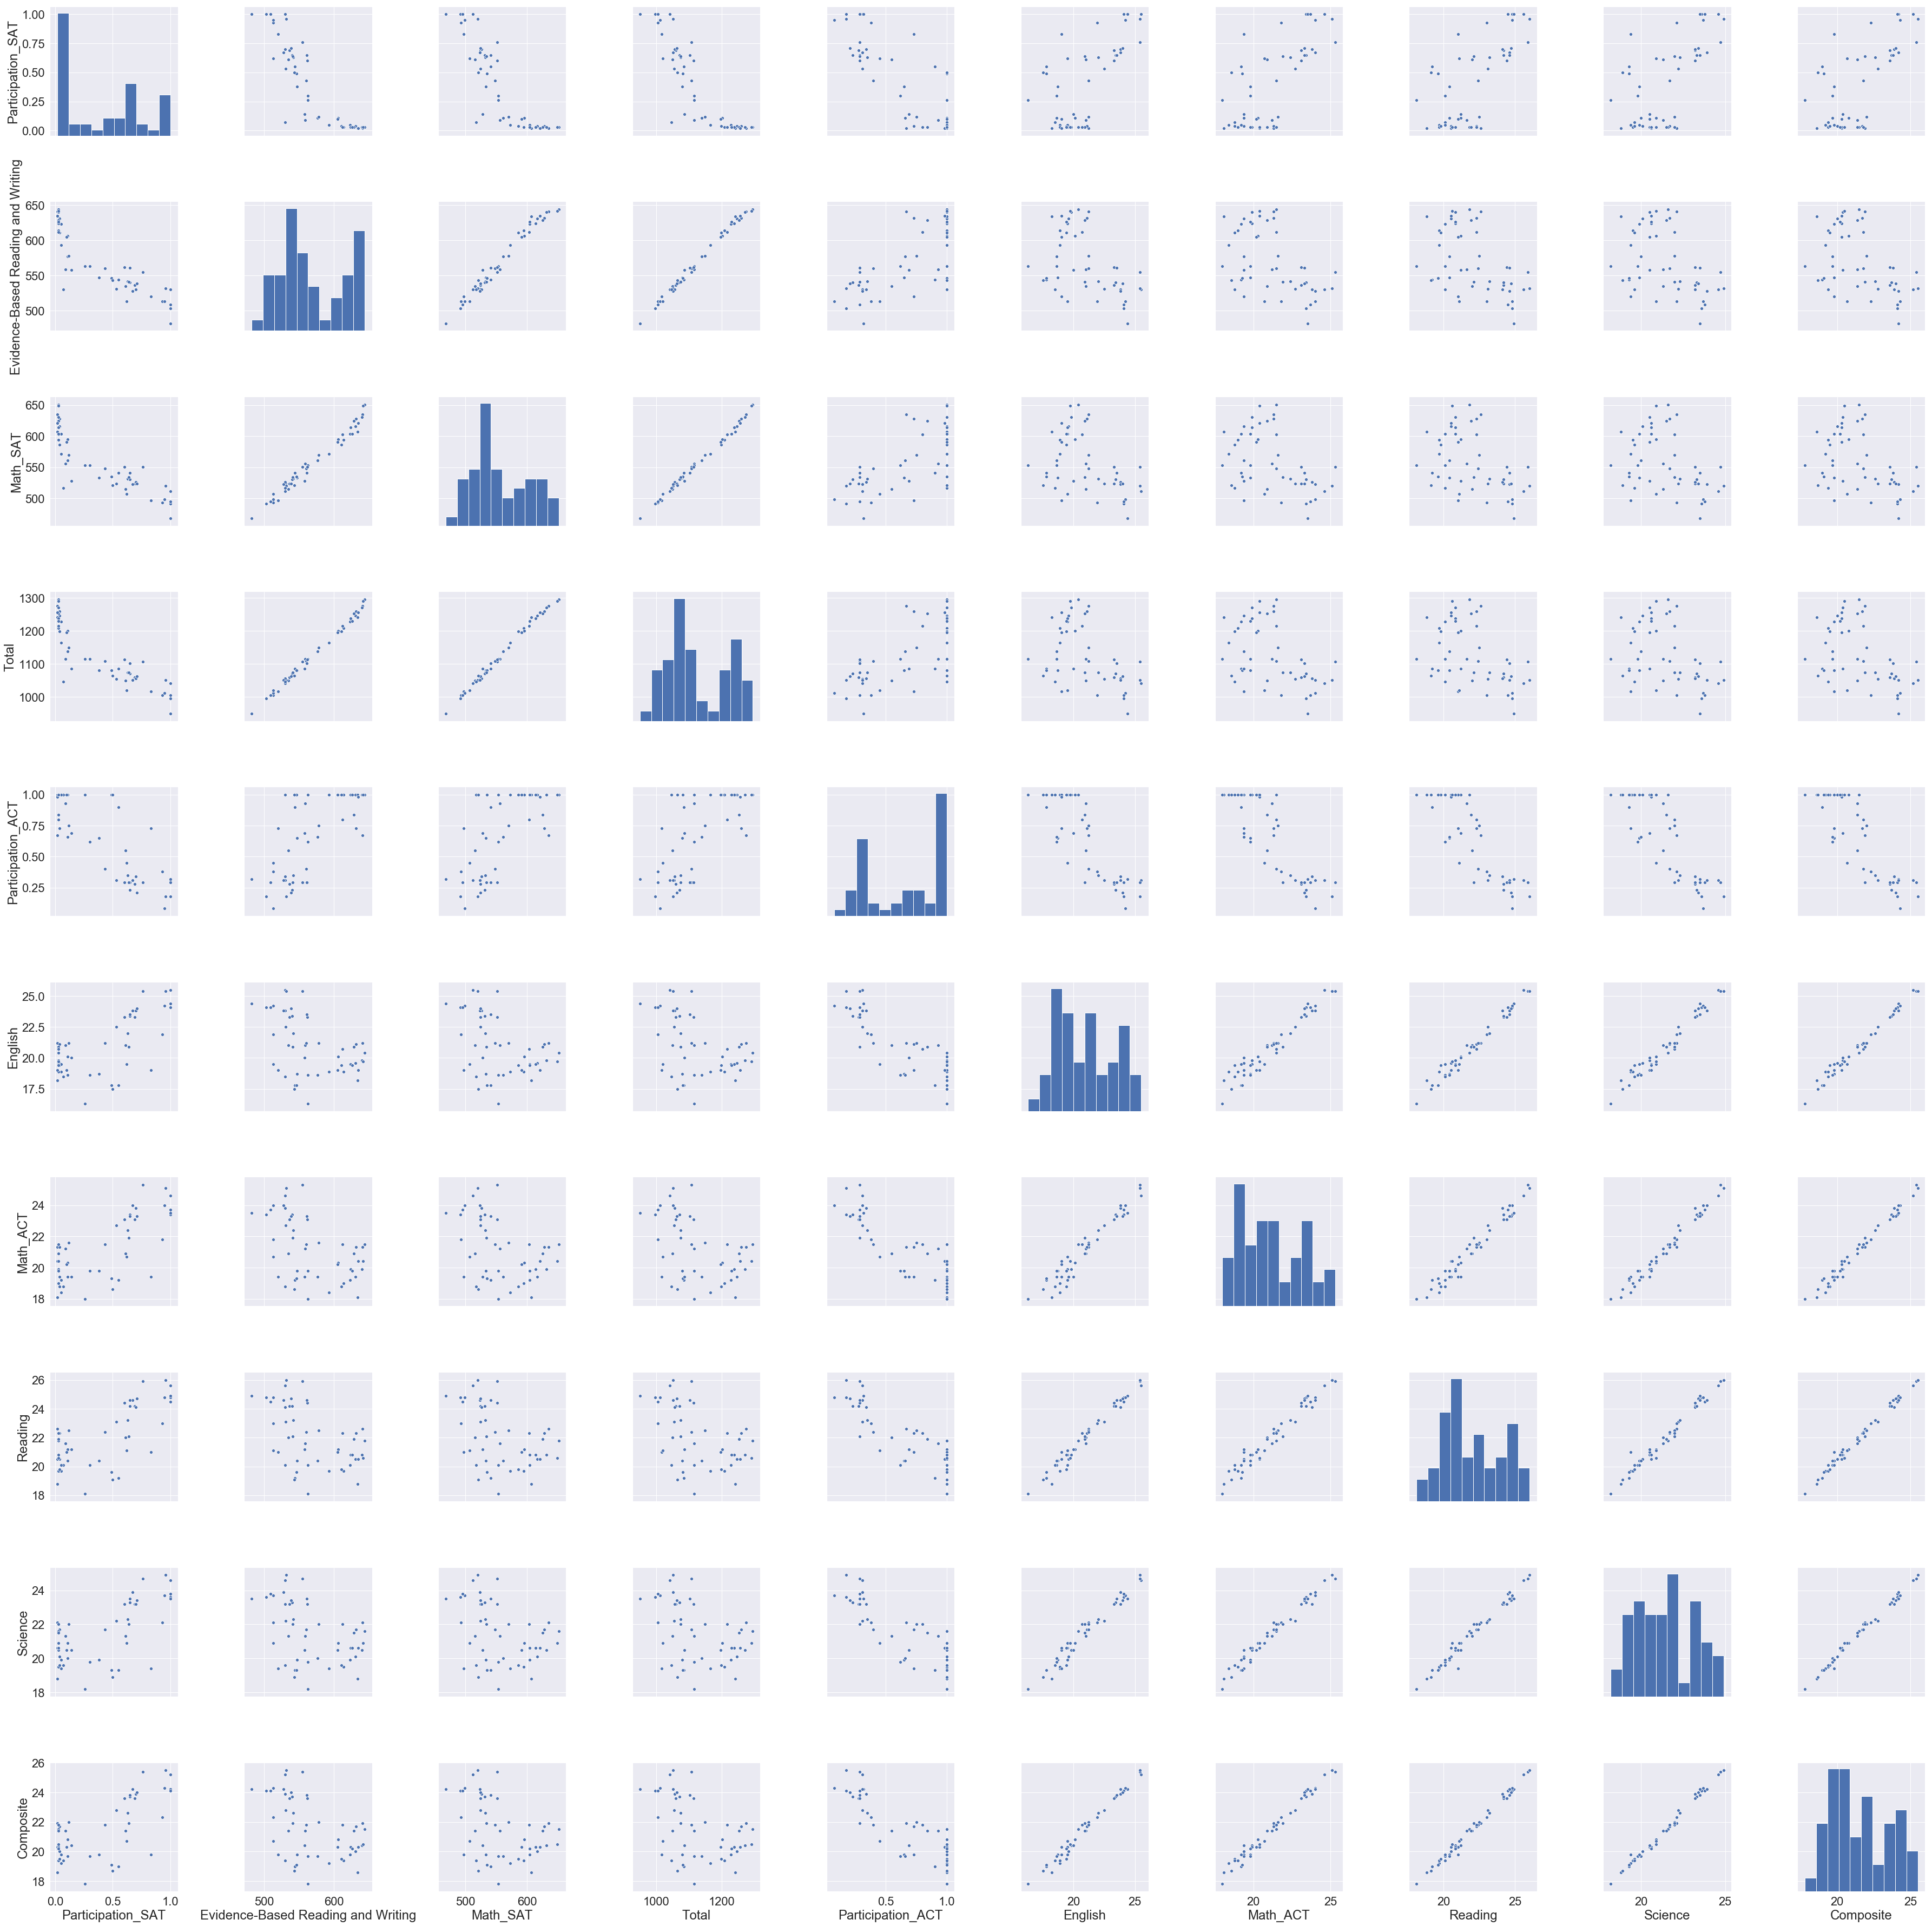

In [42]:
fig = plt.figure(figsize=(20, 10))
sns.set(font_scale=2)
sns.pairplot(stdev_free_combined.dropna(), height= 5)
plt.savefig('../prezFigs/pairPlot.png')

##### 22. Are there any interesting relationships to note?

<ul>
    <li>The strong correlations between test scores of a test is predictable</li>
    <li>Participation_ACT and _SAT are inversely correlated</li>
    <li>With the broken values removed, Math_SAT and Science are in line with the trend of strong intra-test correlation</li>
</ul>
    

##### 23. Create box plots for each variable. 

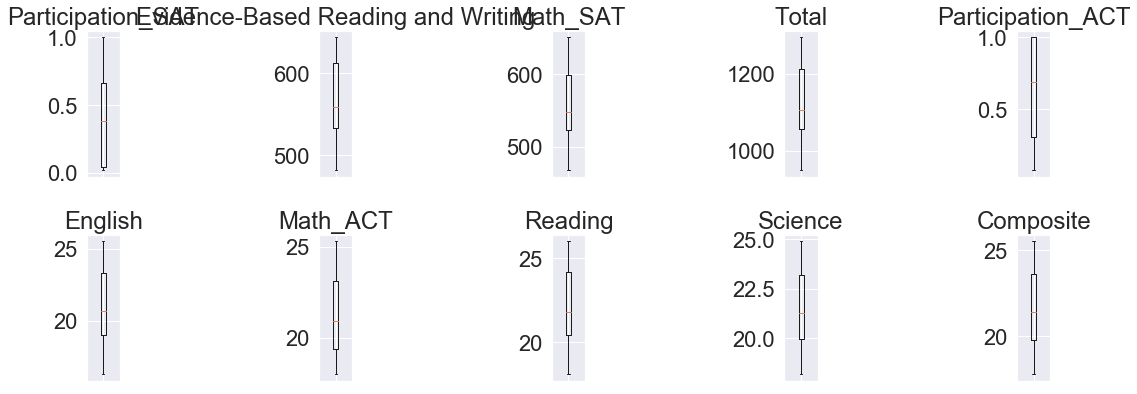

In [43]:
relavent_cols=[stdev_free_combined.dropna()[x] for x in stdev_free_combined.columns if is_numeric_dtype(stdev_free_combined[x])]
fig, axs = plt.subplots(2, 5, figsize=(15,6));
axs= axs.ravel();
for idx, col in enumerate(relavent_cols):
    curr_ax= axs[idx];
    curr_ax.boxplot(col)
    curr_ax.set_title(col.name)
    curr_ax.set_xticklabels([])
fig.align_ylabels()
fig.tight_layout()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [44]:
for aspect in stdev_free_combined:
    col=stdev_free_combined[aspect];
#     print(col)
    if is_numeric_dtype(col):
#         print('yeah')
        print(f"{col.name}: mean= {round(col.mean(),2)}, median={round(col.median(),2)}, skew={round(col.skew(),2)}")

Participation_SAT: mean= 0.4, median=0.38, skew=0.35
Evidence-Based Reading and Writing: mean= 569.12, median=559.0, skew=0.27
Math_SAT: mean= 556.88, median=548.0, skew=0.37
Total: mean= 1126.1, median=1107.0, skew=0.31
Participation_ACT: mean= 0.65, median=0.69, skew=-0.2
English: mean= 20.93, median=20.7, skew=0.35
Math_ACT: mean= 21.18, median=20.9, skew=0.33
Reading: mean= 22.01, median=21.8, skew=0.27
Science: mean= 21.45, median=21.3, skew=0.22
Composite: mean= 21.52, median=21.4, skew=0.32


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [45]:
stdev_free_combined.corr()

,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
Participation_SAT,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748
Evidence-Based Reading and Writing,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382
Math_SAT,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817
Total,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020
Participation_ACT,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134
English,0.686889,-0.461345,-0.420673,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.980042,0.990856
Math_ACT,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.986929,0.990451
Reading,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.988034,0.995069
Science,0.653670,-0.422130,-0.365515,-0.394559,-0.836595,0.980042,0.986929,0.988034,1.000000,0.995129
Composite,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.995129,1.000000


Within Tests, the Participation score is strongly anti-correlated with the test scores. Meanwhile, the Test scores are strongly correlated with each other. 

There seems to be a weak negative correlation between tests, even among equivalent subjects (I.e. Math_SAT and Math_ACT have -0.43 correlation). The only exceptions are the Participation scores, which are positively correlated with subject scores on the <i>other</i> exam. This could be due to the fact that participation scores are strongly anti-correlated with each other, and strongly anti-correlated with their corresponding test scores, and therefore positively correlated with the opposing test scores.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [46]:
# Null Hyp: Participation rates are equal
import scipy.stats as stats
# I decided to look at the tests as independent
# t_test_rel= stats.ttest_rel(stdev_free_combined['Participation_SAT'], stdev_free_combined['Participation_ACT'])
t_test_ind= stats.ttest_ind(stdev_free_combined['Participation_SAT'], stdev_free_combined['Participation_ACT'])
pearsons= stats.pearsonr(stdev_free_combined['Participation_SAT'], stdev_free_combined['Participation_ACT'])

In [47]:
print(f" Independent T:test: {t_test_ind} \n Pearsons Correlation: {pearsons}")

 Independent T:test: Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662356) 
 Pearsons Correlation: (-0.8412344644539915, 1.0963719164527283e-14)


### The hypothesis test results suggest that the Participation rates are not equal, and moreover, the Pearson's Correlation shows that there is a strong negative correlation between the two. 

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [48]:
# courtesy of https://stackoverflow.com/a/15034143/10167851
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [49]:
for rate in ['ACT', 'SAT']:
    interval=mean_confidence_interval(stdev_free_combined['Participation_'+rate]);
    print(f"{rate}: {interval}")

ACT: (0.6525490196078432, 0.5621514448496809, 0.7429465943660054)
SAT: (0.3980392156862746, 0.2988220887277321, 0.4972563426448171)


<h2>Interpretation: We can be 95% certain that the true mean of ACT enrollment is between 56%-74% of students. Meanwhile, we can say with 95% certainty that an average of 30%-50% of students take SAT</h2>

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

### The answers between 26 and 27 corroborate one another. The Independent T test showed that the two distributions are different, and the 95% intervals do not overlap

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

It is appropriate to compare because a state that has excellent math education should have its students perform well on both the ACT and SAT. However, this does not bear out in the correlation...

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

Statistical inference is concerned with samples of larger populations. In our case, our "population" is 100 observations of Average Test Scores. Therefore we should rely more on Descriptive Statistics, not Inferential (because, for example, we don't have enough to think how these values could change over the years)

# Presentation-related Visualizations

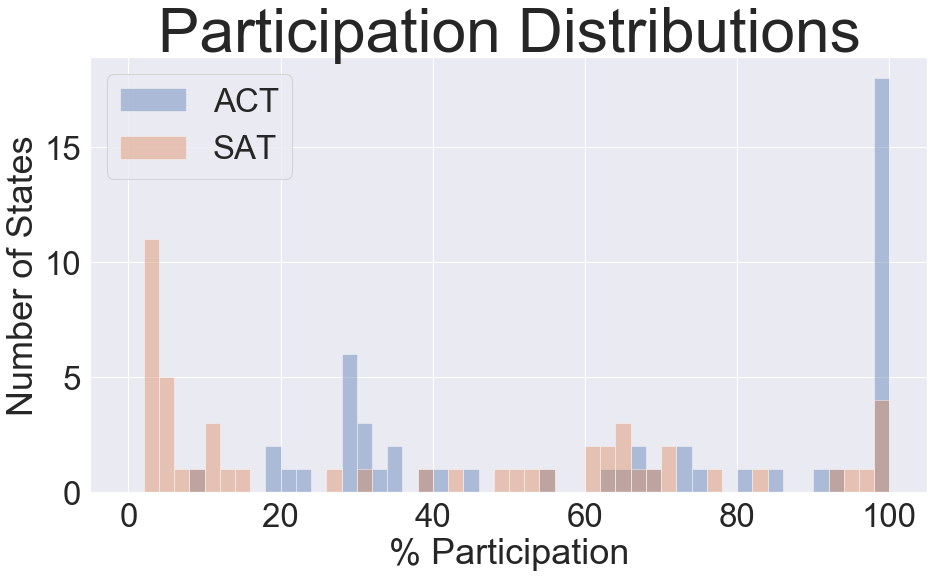

In [50]:
# fig = plt.figure()
# ax1 = fig.add_subplot(211)
# ax1.set_title('SAT Verbal')
# ax2 = fig.add_subplot(212)
# ax2.set_title('ACT Verbal')
# plt.tight_layout(h_pad=3.0)
# sns.distplot(stdev_free_combined['Evidence-Based Reading and Writing'], ax=ax1, axlabel="Score")
sns.set(font_scale=3)
plt.figure(figsize=(15,8))
plt.ylabel('Number of States')
sns.distplot(stdev_free_combined['Participation_ACT'].map(lambda x: x*100), bins=50, label='ACT', axlabel='% Participation', kde=False, hist_kws={"range": [0,100]})
sns.distplot(stdev_free_combined['Participation_SAT'].map(lambda x: x*100), bins=50, label='SAT', axlabel="% Participation", kde=False, hist_kws={"range": [0,100]})

plt.legend()#fontsize='xx-large')
plt.title('Participation Distributions', fontsize='xx-large')
# plt.rc('fontsize', 22)
plt.savefig('../prezfigs/partic_distribs.png')

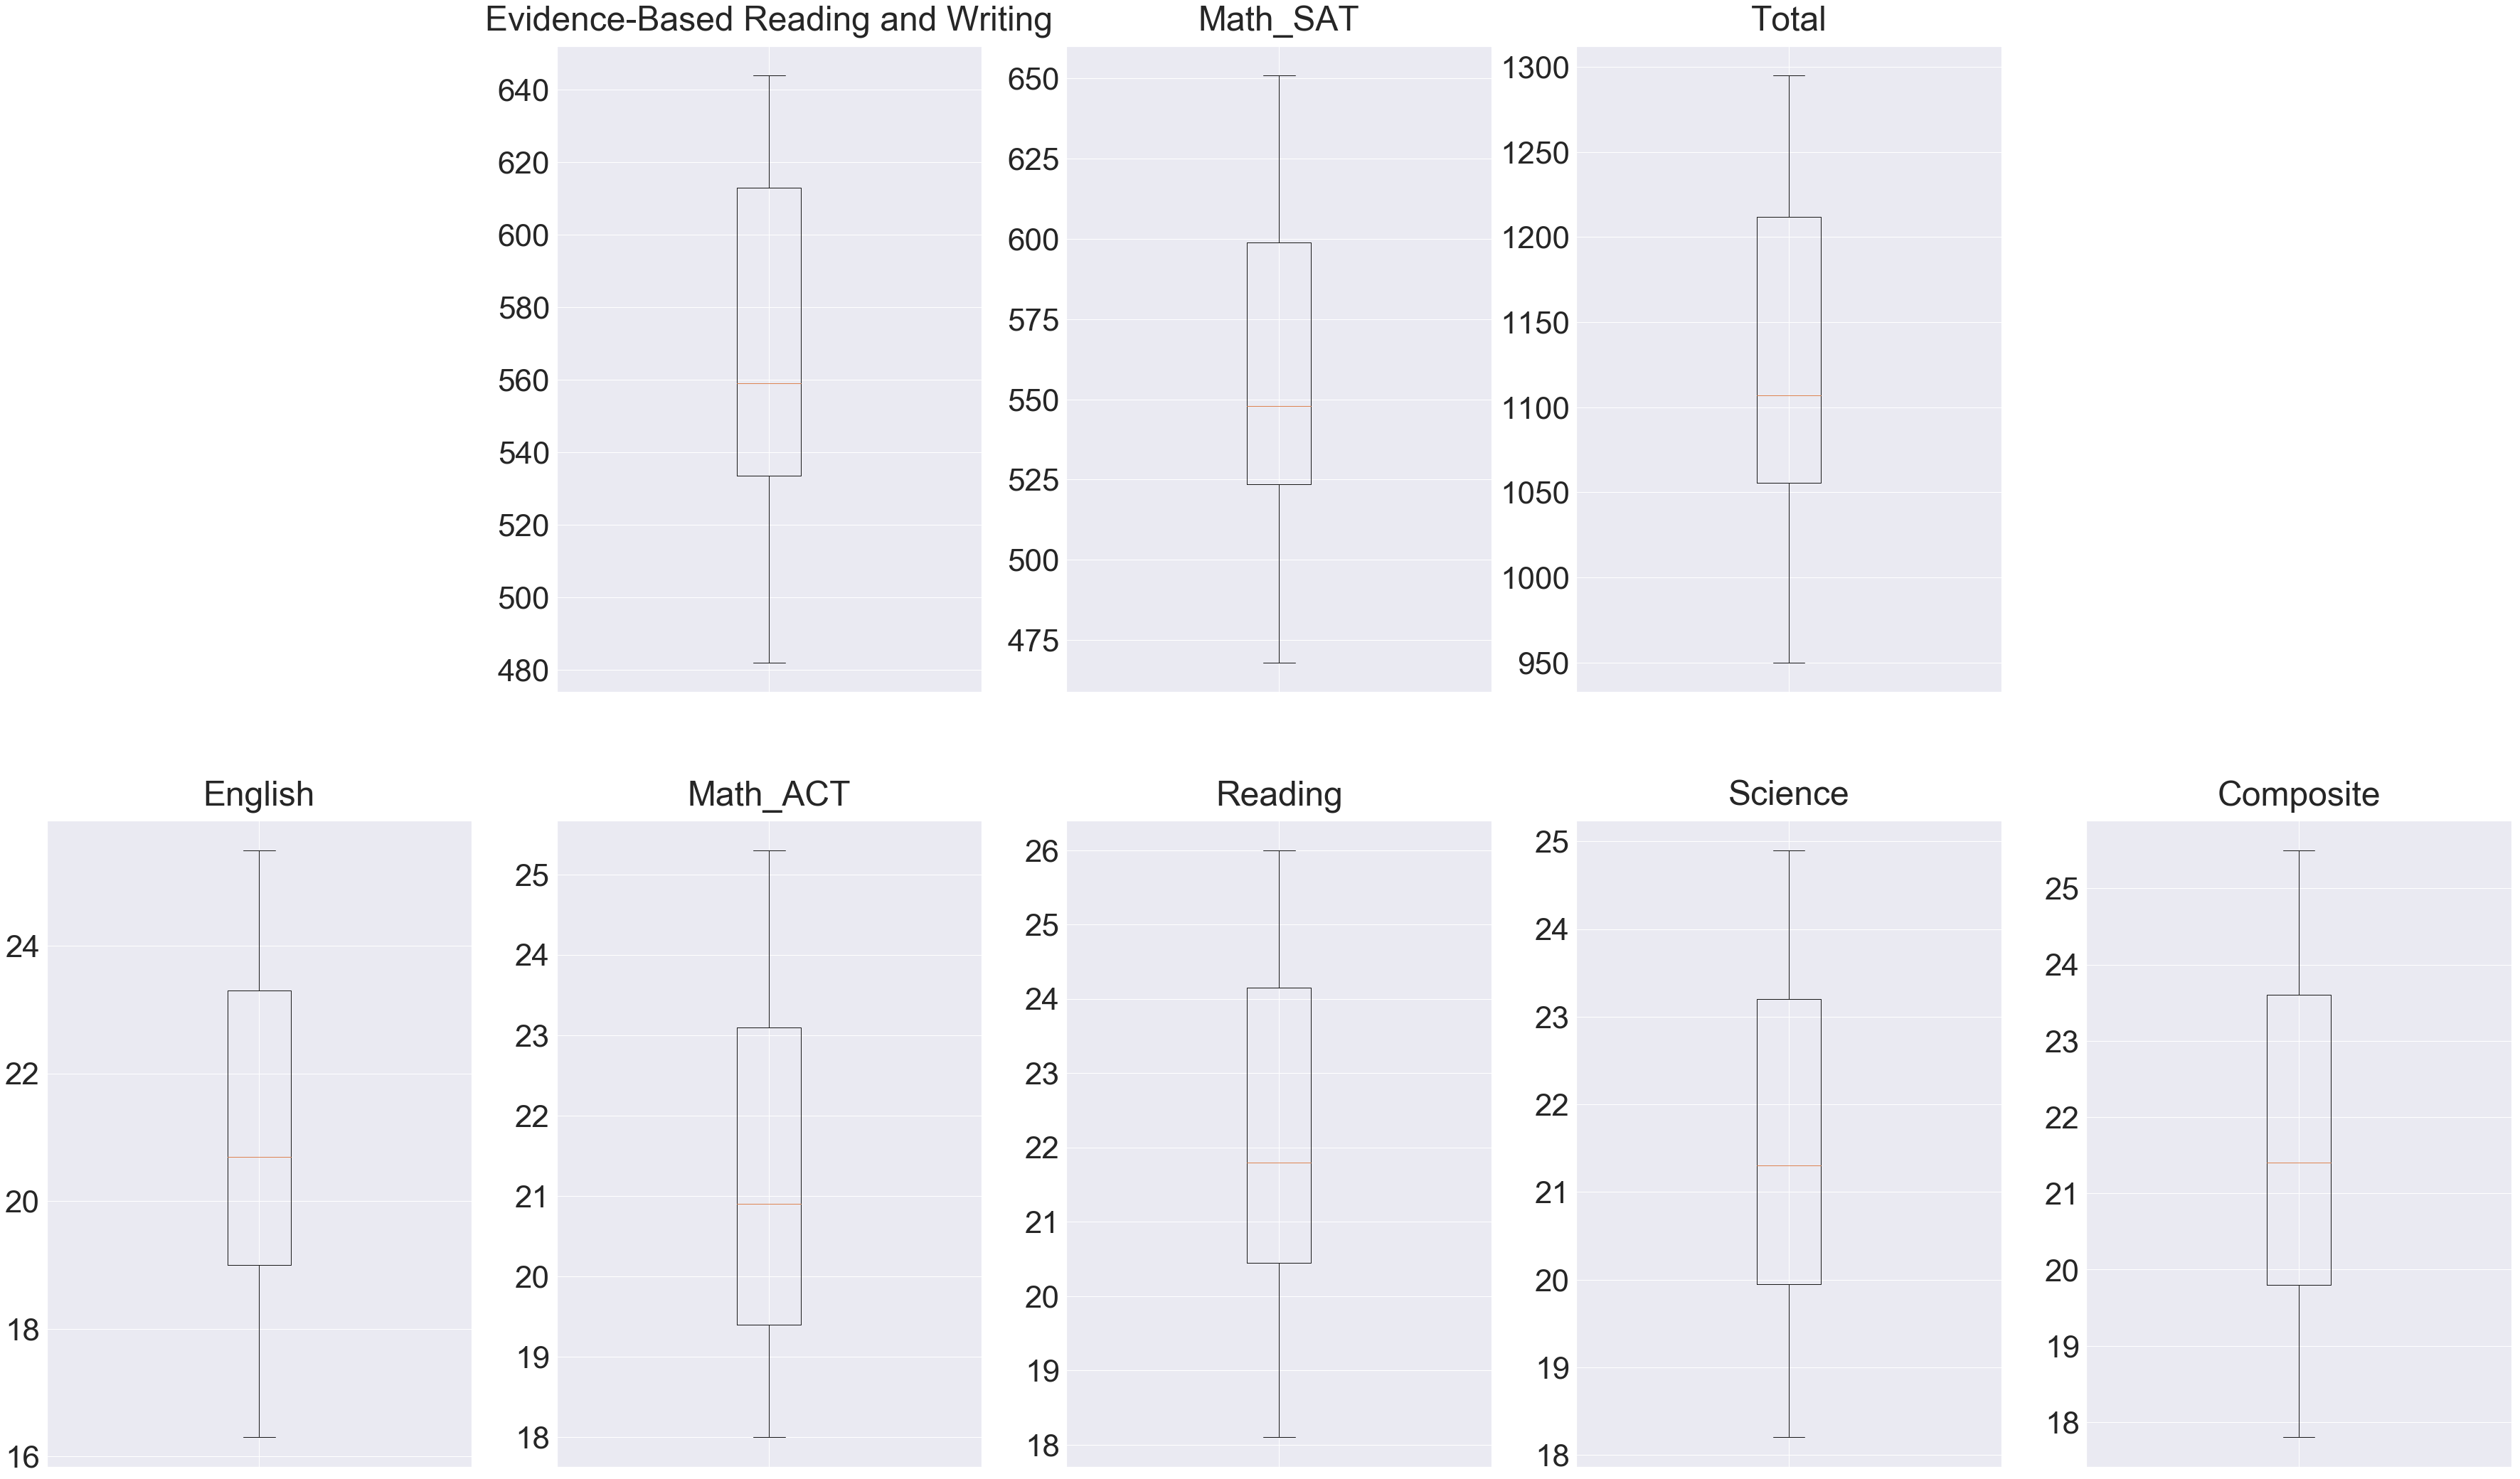

In [51]:
relavent_cols=[stdev_free_combined.dropna()[x] for x in stdev_free_combined.columns if is_numeric_dtype(stdev_free_combined[x])]
sns.set(font_scale=4)
fig, axs = plt.subplots(2, 5, figsize=(55,10));
axs= axs.ravel();
for idx, col in enumerate(relavent_cols):
    curr_ax= axs[idx];
    if col.name in ['Participation_ACT', 'Participation_SAT']:
        curr_ax.set_visible(False)
        continue
    curr_ax.set
    curr_ax.boxplot(col)
    curr_ax.set_title(col.name, pad=22)
#     curr_ax.text(0, 1.5, col.name, horizontalalignment='center', fontsize=20)
    curr_ax.set_xticklabels([])
plt.subplots_adjust(top=2.9, right= 1)
fig.align_ylabels()
# fig.tight_layout()
plt.savefig('../prezFigs/scoreBoxPlots.png')

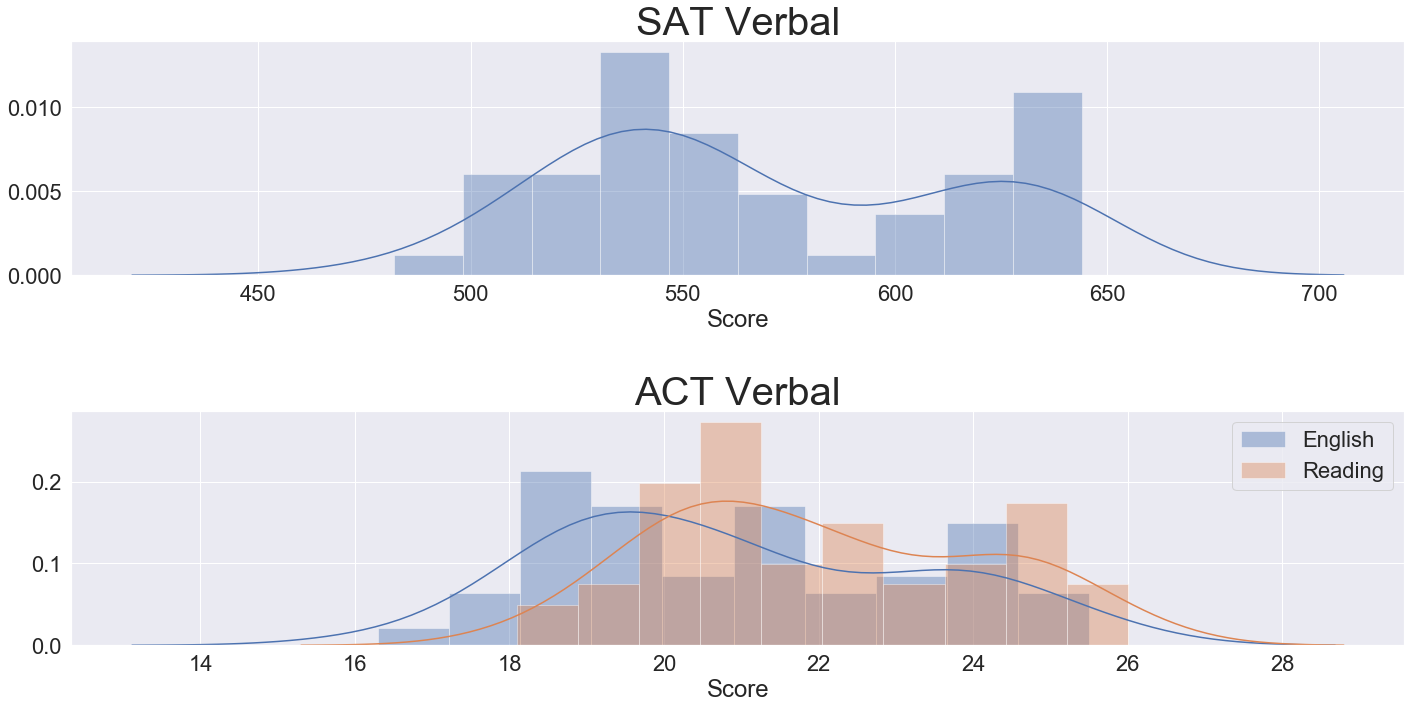

In [52]:
# Create a figure instance, and the two subplots
sns.set(font_scale=2)
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax1.set_title('SAT Verbal', fontsize=40)
ax2 = fig.add_subplot(212)
ax2.set_title('ACT Verbal', fontsize=40)
plt.tight_layout(h_pad=3.0)

sns.distplot(stdev_free_combined['Evidence-Based Reading and Writing'], ax=ax1, axlabel="Score", bins=10)
sns.distplot(stdev_free_combined['English'], ax=ax2, label='English', axlabel='score', bins=10)
sns.distplot(stdev_free_combined['Reading'], ax=ax2, label='Reading', axlabel="Score", bins=10)

plt.legend()
# plt.savefig('../prezFigs/verbalPDF.png')


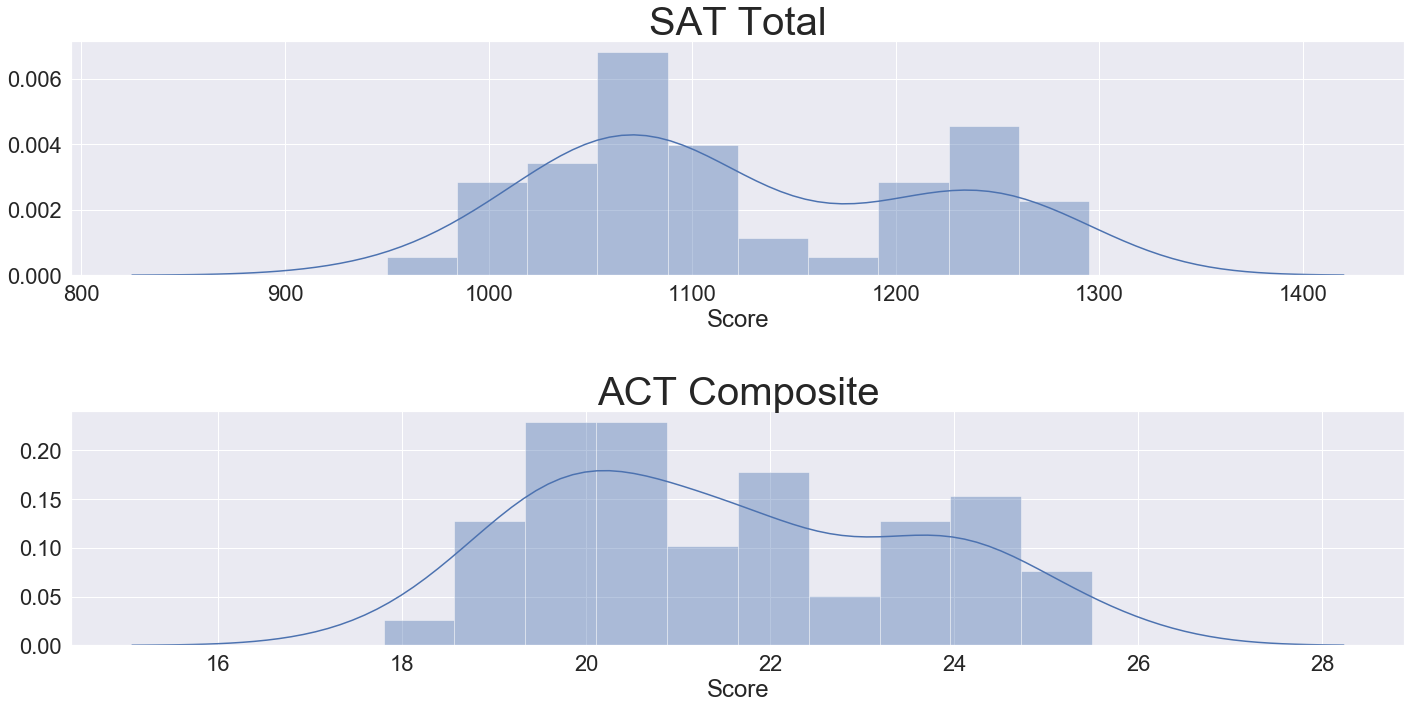

In [53]:
# Create a figure instance, and the two subplots
sns.set(font_scale=2)
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax1.set_title('SAT Total', fontsize=40)
ax2 = fig.add_subplot(212)
ax2.set_title('ACT Composite', fontsize=40)
plt.tight_layout(h_pad=3.0)

sns.distplot(stdev_free_combined['Total'], ax=ax1, axlabel="Score", bins=10)
sns.distplot(stdev_free_combined['Composite'], ax=ax2, axlabel='Score', bins=10)
# sns.distplot(stdev_free_combined['Reading'], ax=ax2, label='Reading', axlabel="Score", bins=10)

# plt.legend()
# plt.savefig('../prezFigs/totalsPDF.png')


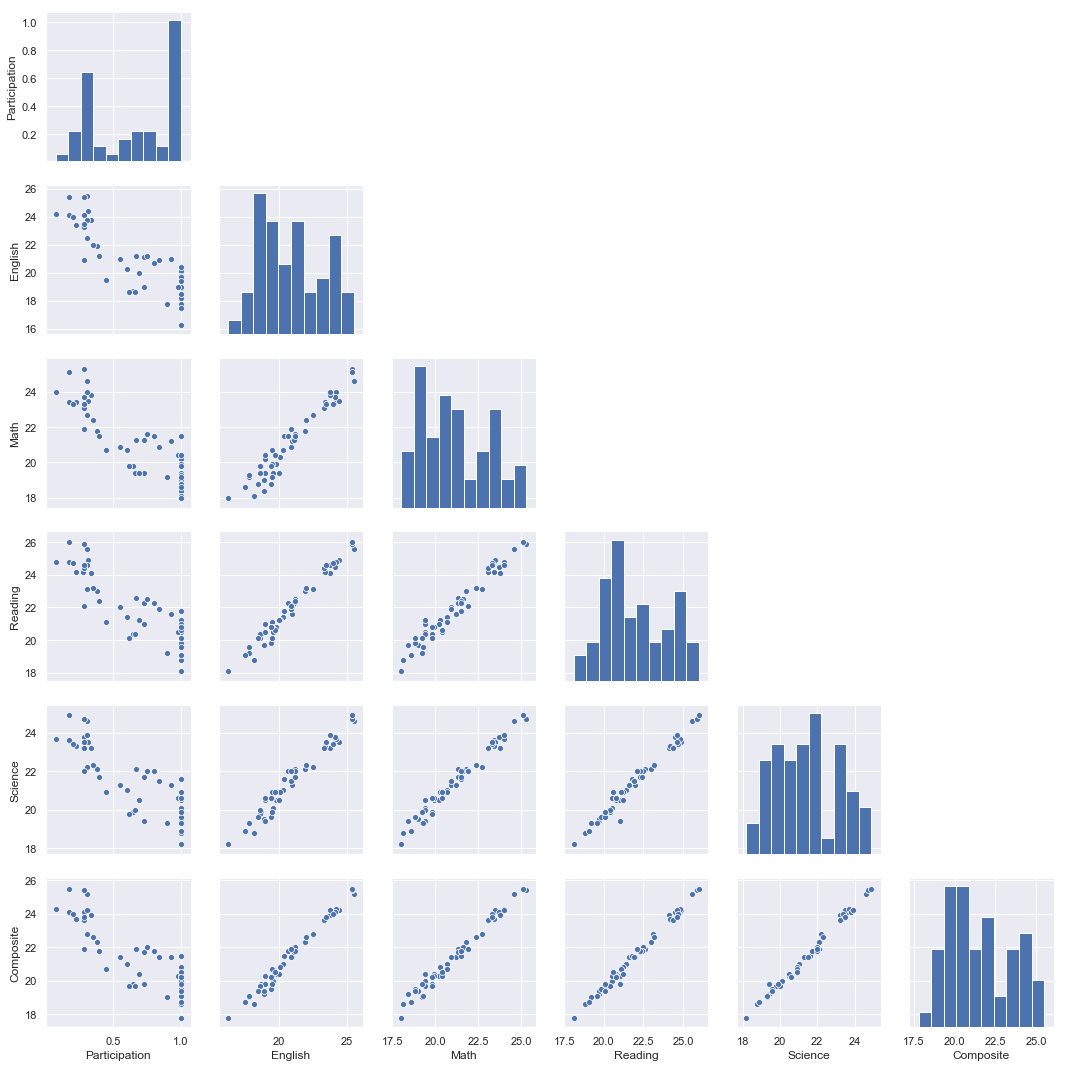

In [54]:
sns.set(font_scale=1)
g = sns.pairplot(act_data.iloc[:, 1:])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.savefig('../prezFigs/act_corr.png', transparent= True)

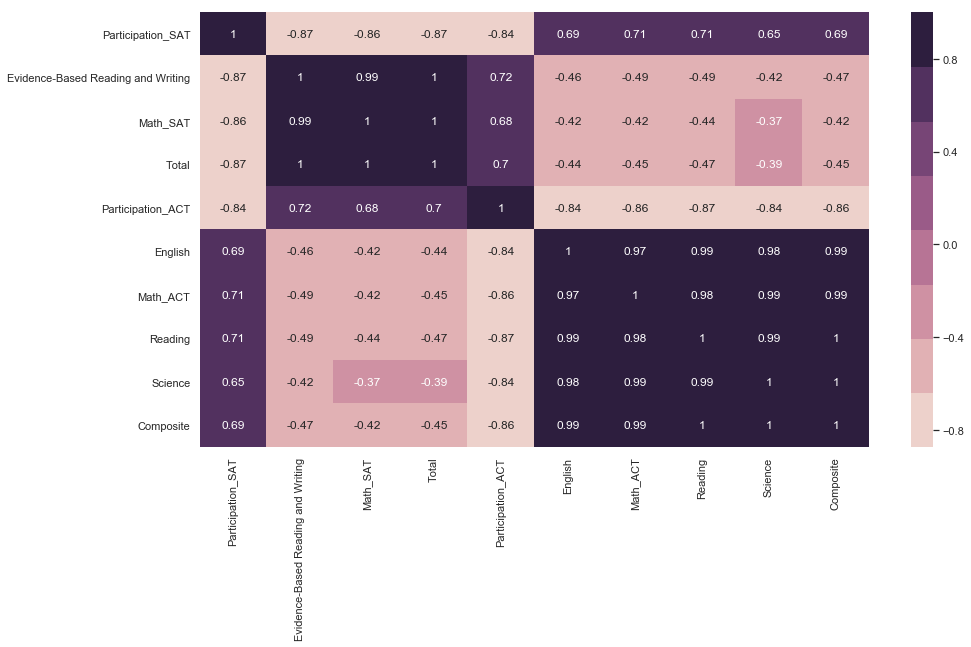

In [55]:
# A:
plt.figure(figsize=(15,8))
sns.heatmap(stdev_free_combined.corr(),cmap=sns.cubehelix_palette(8), annot=True)
plt.savefig('../prezFigs/heatmap.png', bbox_inches='tight')

In [56]:
stdev_free_combined.sort_values('Composite', ascending=False)[['State', 'Participation_ACT','Composite']]

,State,Participation_ACT,Composite
29,New Hampshire,0.18,25.5
21,Massachusetts,0.29,25.4
6,Connecticut,0.31,25.2
19,Maine,0.08,24.3
8,District of Columbia,0.32,24.2
32,New York,0.31,24.2
22,Michigan,0.29,24.1
7,Delaware,0.18,24.1
39,Rhode Island,0.21,24.0
30,New Jersey,0.34,23.9


<Figure size 1440x720 with 0 Axes>

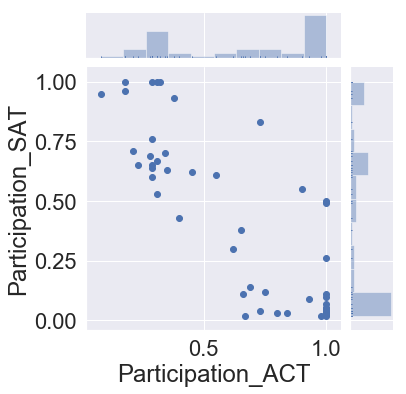

In [57]:
# Create a figure instance, and the two subplots
sns.set(font_scale=2)
fig = plt.figure(figsize=(20, 10))
sns.jointplot(stdev_free_combined['Participation_ACT'], stdev_free_combined['Participation_SAT'], marginal_kws=dict(bins=10, rug=True),)
# ax1 = fig.add_subplot(211)
# ax1.set_title('SAT Verbal', fontsize=40)
# ax2 = fig.add_subplot(212)
# ax2.set_title('ACT Verbal', fontsize=40)
# plt.tight_layout(h_pad=3.0)

# sns.distplot(stdev_free_combined['Evidence-Based Reading and Writing'], ax=ax1, axlabel="Score", bins=10)
# sns.distplot(stdev_free_combined['English'], ax=ax2, label='English', axlabel='score', bins=10)
# sns.distplot(stdev_free_combined['Reading'], ax=ax2, label='Reading', axlabel="Score", bins=10)

# plt.legend()
# plt.savefig('../prezFigs/verbalPDF.png')


In [58]:
ugly_md=pd.read_csv('../data/act.csv')

In [59]:
ugly_md.sort_values('Science')

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
21,21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
29,29,Nevada,100%,16.3,18.0,18.1,18.2,17.8
25,25,Mississippi,100%,18.2,18.1,18.8,18.8,18.6
41,41,South Carolina,100%,17.5,18.6,19.1,18.9,18.7
34,34,North Carolina,100%,17.8,19.3,19.6,19.3,19.1
12,12,Hawaii,90%,17.8,19.2,19.2,19.3,19.0
10,10,Florida,73%,19.0,19.4,21.0,19.4,19.8
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
37,37,Oklahoma,100%,18.5,18.8,20.1,19.6,19.4
